## Installing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Datasets

In [2]:
deliveries= pd.read_csv("/workspaces/projects/Team_Winning_Chances_End_to_End/Data/deliveries.csv")
matches=pd.read_csv("/workspaces/projects/Team_Winning_Chances_End_to_End/Data/matches.csv")

#### Pre Inspection

In [3]:
matches = matches.rename(columns={
    'id': 'ID',
    'season': 'Season',
    'city': 'City',
    'date': 'Date',
    'player_of_match': 'Player_of_Match',
    'venue': 'Venue',
    'team1': 'Team1',
    'team2': 'Team2',
    'toss_winner': 'TossWinner',
    'toss_decision': 'TossDecision',
    'winner': 'WinningTeam',
    'result': 'WonBy',
    'result_margin': 'Margin',
    'super_over': 'SuperOver',
    'method': 'method',
    'umpire1': 'Umpire1',
    'umpire2': 'Umpire2'
})
matches.head()

,ID,Season,City,Date,match_type,Player_of_Match,Venue,Team1,Team2,TossWinner,TossDecision,WinningTeam,WonBy,Margin,target_runs,target_overs,SuperOver,method,Umpire1,Umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
deliveries = deliveries.rename(columns={
    'match_id': 'ID',
    'inning': 'innings',
    'batting_team': 'BattingTeam',
    'bowling_team': 'BowlingTeam',
    'over': 'overs',
    'ball': 'ballnumber',
    'batsman_runs': 'batsman_run',
    'extra_runs': 'extras_run',
    'total_runs': 'total_run',
    'extras_type': 'extra_type',
    'is_wicket': 'isWicketDelivery',
    'player_dismissed': 'player_out',
    'dismissal_kind': 'kind',
    'fileder': 'fielders_involved'
})

#### Adding total score column in Matches df

In [6]:
total_score_df= deliveries.groupby(['ID','innings']).sum()['total_run'].reset_index()

In [7]:
team1_score_df=total_score_df[total_score_df['innings']==1]
team2_score_df=total_score_df[total_score_df['innings']==2]

In [8]:
team1_score_df.rename(columns={'total_run': 'team1_runs'}, inplace=True)
team2_score_df.rename(columns={'total_run': 'team2_runs'}, inplace=True)

/tmp/ipykernel_25592/2836941195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1_score_df.rename(columns={'total_run': 'team1_runs'}, inplace=True)
/tmp/ipykernel_25592/2836941195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team2_score_df.rename(columns={'total_run': 'team2_runs'}, inplace=True)


In [9]:
matches=matches.merge(team2_score_df[['ID','team2_runs']],on='ID')
matches=matches.merge(team1_score_df[['ID','team1_runs']],on='ID')

In [10]:
matches

,ID,Season,City,Date,match_type,Player_of_Match,Venue,Team1,Team2,TossWinner,...,WonBy,Margin,target_runs,target_overs,SuperOver,method,Umpire1,Umpire2,team2_runs,team1_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,82,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,207,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,132,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,166,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,112,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,215,214
1088,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,164,159
1089,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,174,172
1090,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,139,175


#### Editing Team names to latest ones

In [11]:
matches['Team1'].unique().tolist()

['Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Delhi Daredevils',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Chennai Super Kings',
 'Kochi Tuskers Kerala',
 'Pune Warriors',
 'Sunrisers Hyderabad',
 'Gujarat Lions',
 'Rising Pune Supergiants',
 'Rising Pune Supergiant',
 'Delhi Capitals',
 'Punjab Kings',
 'Lucknow Super Giants',
 'Gujarat Titans',
 'Royal Challengers Bengaluru']

In [12]:
teams=['Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Gujarat Titans',
 'Lucknow Super Giants',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Mumbai Indians']

In [13]:
matches['Team1']= matches['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['Team2']= matches['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['Team1']= matches['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
matches['Team2']= matches['Team2'].str.replace('Kings XI Punjab','Punjab Kings')
matches['Team1']= matches['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['Team2']= matches['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['Team1']= matches['Team1'].str.replace('Royal Challengers Bengaluru','Royal Challengers Bangalore')
matches['Team2']= matches['Team2'].str.replace('Royal Challengers Bengaluru','Royal Challengers Bangalore')
deliveries['BattingTeam'] = deliveries['BattingTeam'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore'
})

In [14]:
matches=matches[matches['Team1'].isin(teams)]
matches=matches[matches['Team2'].isin(teams)]
deliveries=deliveries[deliveries['BattingTeam'].isin(teams)]

#### Handling Missing Values in Matches df

In [15]:
matches.isnull().sum()

ID                   0
Season               0
City                51
Date                 0
match_type           0
Player_of_Match      2
Venue                0
Team1                0
Team2                0
TossWinner           0
TossDecision         0
WinningTeam          2
WonBy                0
Margin              15
target_runs          0
target_overs         0
SuperOver            0
method             961
Umpire1              0
Umpire2              0
team2_runs           0
team1_runs           0
dtype: int64

In [16]:
matches['City'] = matches.apply(lambda row: row['Venue'].split()[0] if pd.isnull(row['City']) else row['City'], axis=1)

In [17]:
matches[matches['SuperOver'].isnull()]

,ID,Season,City,Date,match_type,Player_of_Match,Venue,Team1,Team2,TossWinner,...,WonBy,Margin,target_runs,target_overs,SuperOver,method,Umpire1,Umpire2,team2_runs,team1_runs


In [18]:
matches.dropna(subset=['SuperOver'], inplace=True)

In [19]:
matches['Margin'].fillna(0, inplace=True)

/tmp/ipykernel_25592/2118410910.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['Margin'].fillna(0, inplace=True)


In [20]:
matches['method'].fillna('No', inplace=True)

/tmp/ipykernel_25592/894305547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['method'].fillna('No', inplace=True)


In [21]:
matches.head(5).T

,0,1,2,3,4
ID,335982,335983,335984,335985,335986
Season,2007/08,2007/08,2007/08,2007/08,2007/08
City,Bangalore,Chandigarh,Delhi,Mumbai,Kolkata
Date,2008-04-18,2008-04-19,2008-04-19,2008-04-20,2008-04-20
match_type,League,League,League,League,League
Player_of_Match,BB McCullum,MEK Hussey,MF Maharoof,MV Boucher,DJ Hussey
Venue,M Chinnaswamy Stadium,"Punjab Cricket Association Stadium, Mohali",Feroz Shah Kotla,Wankhede Stadium,Eden Gardens
Team1,Royal Challengers Bangalore,Punjab Kings,Delhi Capitals,Mumbai Indians,Kolkata Knight Riders
Team2,Kolkata Knight Riders,Chennai Super Kings,Rajasthan Royals,Royal Challengers Bangalore,Sunrisers Hyderabad
TossWinner,Royal Challengers Bangalore,Chennai Super Kings,Rajasthan Royals,Mumbai Indians,Deccan Chargers


In [22]:
deliveries.head(5).T

,0,1,2,3,4
ID,335982,335982,335982,335982,335982
innings,1,1,1,1,1
BattingTeam,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders
BowlingTeam,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore
overs,0,0,0,0,0
ballnumber,1,2,3,4,5
batter,SC Ganguly,BB McCullum,BB McCullum,BB McCullum,BB McCullum
bowler,P Kumar,P Kumar,P Kumar,P Kumar,P Kumar
non_striker,BB McCullum,SC Ganguly,SC Ganguly,SC Ganguly,SC Ganguly
batsman_run,0,0,0,0,0


In [23]:
filtered_matches=matches[['ID','City','WinningTeam','team2_runs','team1_runs','Margin','TossWinner','TossDecision','SuperOver','WonBy','method','Player_of_Match','Team2']]

In [24]:
deliveries=deliveries[deliveries['innings']==2]
deliveries.shape

(118571, 17)

In [25]:
df= filtered_matches.merge(deliveries,on='ID')
df.head(5).T

,0,1,2,3,4
ID,335982,335982,335982,335982,335982
City,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore
WinningTeam,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders
team2_runs,82,82,82,82,82
team1_runs,222,222,222,222,222
Margin,140.0,140.0,140.0,140.0,140.0
TossWinner,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore
TossDecision,field,field,field,field,field
SuperOver,N,N,N,N,N
WonBy,runs,runs,runs,runs,runs


In [26]:
df.fillna('No',inplace=True)

In [27]:
df.dtypes

ID                    int64
City                 object
WinningTeam          object
team2_runs            int64
team1_runs            int64
Margin              float64
TossWinner           object
TossDecision         object
SuperOver            object
WonBy                object
method               object
Player_of_Match      object
Team2                object
innings               int64
BattingTeam          object
BowlingTeam          object
overs                 int64
ballnumber            int64
batter               object
bowler               object
non_striker          object
batsman_run           int64
extras_run            int64
total_run             int64
extra_type           object
isWicketDelivery      int64
player_out           object
kind                 object
fielder              object
dtype: object

In [28]:
df['current score'] = df.groupby('ID')['total_run'].cumsum()

In [29]:
df['runs_left']=df['team1_runs']-df['current score']

In [30]:
df['balls_left']= 120-(df['overs']*6+df['ballnumber'])

In [31]:
df = df[df['method'] == 'No']
df.drop('method',axis=1,inplace=True)

In [32]:
df['wickets'] = df.groupby('ID')['isWicketDelivery'].cumsum()
df['wickets_left']=10-df['wickets']

In [33]:
df.drop('wickets',axis=1,inplace=True)

In [34]:
df= df[df['balls_left']>0]
df= df[df['runs_left']>0]

In [35]:
df.shape

(110481, 32)

In [36]:
df=df[df['SuperOver']!='Y']
df.shape

(108886, 32)

In [37]:
df['crr']=df['current score']/((120-df['balls_left'])/6)

In [38]:
df['rrr']=df['runs_left']/(df['balls_left']/6)

In [39]:
def result(row):
    return 1 if row['BattingTeam']==row['WinningTeam'] else 0

In [40]:
df['results']= df.apply(result,axis=1)
df.tail().T

,112798,112799,112800,112801,112802
ID,1426312,1426312,1426312,1426312,1426312
City,Chennai,Chennai,Chennai,Chennai,Chennai
WinningTeam,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders
team2_runs,114,114,114,114,114
team1_runs,113,113,113,113,113
Margin,8.0,8.0,8.0,8.0,8.0
TossWinner,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad
TossDecision,bat,bat,bat,bat,bat
SuperOver,N,N,N,N,N
WonBy,wickets,wickets,wickets,wickets,wickets


In [42]:
fdf = df[['BattingTeam','Team2','City','runs_left','balls_left','wickets_left','crr','rrr','results']]
fdf

,BattingTeam,Team2,City,runs_left,balls_left,wickets_left,crr,rrr,results
0,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,119,10,6.000000,11.142857,0
1,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,118,10,6.000000,11.186441,0
2,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,117,10,4.000000,11.282051,0
3,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,116,10,4.500000,11.327586,0
4,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,218,115,10,4.800000,11.373913,0
...,...,...,...,...,...,...,...,...,...
112798,Kolkata Knight Riders,Kolkata Knight Riders,Chennai,5,63,8,11.368421,0.476190,1
112799,Kolkata Knight Riders,Kolkata Knight Riders,Chennai,4,62,8,11.275862,0.387097,1
112800,Kolkata Knight Riders,Kolkata Knight Riders,Chennai,3,61,8,11.186441,0.295082,1
112801,Kolkata Knight Riders,Kolkata Knight Riders,Chennai,2,60,8,11.100000,0.200000,1


In [43]:
fdf=fdf.sample(fdf.shape[0])

In [44]:
fdf

,BattingTeam,Team2,City,runs_left,balls_left,wickets_left,crr,rrr,results
96856,Rajasthan Royals,Rajasthan Royals,Guwahati,117,65,7,8.727273,10.800000,0
87761,Sunrisers Hyderabad,Sunrisers Hyderabad,Pune,208,114,10,2.000000,10.947368,0
76657,Kolkata Knight Riders,Kolkata Knight Riders,Sharjah,95,17,2,5.766990,33.529412,0
968,Rajasthan Royals,Rajasthan Royals,Hyderabad,88,49,8,10.647887,10.775510,1
53765,Mumbai Indians,Kolkata Knight Riders,Mumbai,107,81,9,10.307692,7.925926,1
...,...,...,...,...,...,...,...,...,...
36155,Punjab Kings,Punjab Kings,Chennai,18,5,6,8.765217,21.600000,0
58209,Mumbai Indians,Royal Challengers Bangalore,Mumbai,83,58,7,7.645161,8.586207,1
88950,Lucknow Super Giants,Lucknow Super Giants,Mumbai,135,103,10,4.941176,7.864078,1
55240,Delhi Capitals,Delhi Capitals,Visakhapatnam,87,15,2,6.800000,34.800000,0


In [45]:
fdf.describe()

,runs_left,balls_left,wickets_left,crr,rrr,results
count,108886.000000,108886.000000,108886.000000,108886.000000,108886.000000,108886.000000
mean,94.837334,63.149781,7.524484,7.585301,10.820187,0.426345
std,50.524249,33.089861,2.156333,2.354530,13.139375,0.494547
min,1.000000,1.000000,0.000000,0.000000,0.083333,0.000000
25%,55.000000,35.000000,6.000000,6.375000,7.266667,0.000000
50%,94.000000,64.000000,8.000000,7.611940,9.025641,0.000000
75%,132.000000,92.000000,9.000000,8.853359,11.236364,1.000000
max,286.000000,119.000000,10.000000,36.000000,708.000000,1.000000


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer= ColumnTransformer([('cat', OneHotEncoder(drop='first'),['BattingTeam','Team2','City'])],remainder="passthrough")

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(fdf.drop('results',axis=1),fdf['results'],test_size=0.2)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [49]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

pipeline = Pipeline([
    ('transformer', transformer),
    ('model', XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, 
                            subsample=0.8, colsample_bytree=0.8, random_state=42))
])

pipeline.fit(X_train, y_train)

/workspaces/projects/.venv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['BattingTeam', 'Team2',
                                                   'City'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=Fa...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [50]:
pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.9189549086233814


In [51]:
pipeline.predict_proba(X_test.sample())

array([[0.8866586 , 0.11334138]], dtype=float32)

In [52]:
df.head().T

,0,1,2,3,4
ID,335982,335982,335982,335982,335982
City,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore
WinningTeam,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders
team2_runs,82,82,82,82,82
team1_runs,222,222,222,222,222
Margin,140.0,140.0,140.0,140.0,140.0
TossWinner,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore
TossDecision,field,field,field,field,field
SuperOver,N,N,N,N,N
WonBy,runs,runs,runs,runs,runs


In [53]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['ID'] == match_id]# Collecting all data of 1 Match
    match = match[(match['ballnumber'] == 6)]# Filtering onlt the 6th ball
    temp_df = match[['BattingTeam','Team2','City','runs_left','balls_left','wickets_left','crr','rrr','team1_runs']]# Final df with selected columns
    result = pipeline.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,2)#loose percentage
    temp_df['win'] = np.round(result.T[1]*100,2)#win percentage
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['team1_runs'].values[0]# getting target value
    temp_df['current_score']= target-temp_df['runs_left']
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win','current_score','rrr','crr']]
    return temp_df,target

In [54]:
pd.options.mode.chained_assignment = None

In [55]:
temp_df,target = match_progression(df,335990,pipeline)
temp_df

Target- 214


,end_of_over,runs_after_over,wickets_in_over,lose,win,current_score,rrr,crr
902,1,5,0,63.939999,36.060001,5,11.000000,5.000000
908,2,9,0,64.870003,35.130001,14,11.111111,7.000000
914,3,5,1,75.120003,24.879999,19,11.470588,6.333333
920,4,12,0,70.970001,29.030001,31,11.437500,7.750000
927,5,26,0,62.509998,37.490002,57,10.466667,11.400000
933,6,16,0,45.220001,54.779999,73,10.071429,12.166667
939,7,9,0,42.360001,57.639999,82,10.153846,11.714286
945,8,16,0,31.090000,68.910004,98,9.666667,12.250000
951,9,12,0,27.370001,72.629997,110,9.454545,12.222222
957,10,4,1,43.080002,56.919998,114,10.000000,11.400000


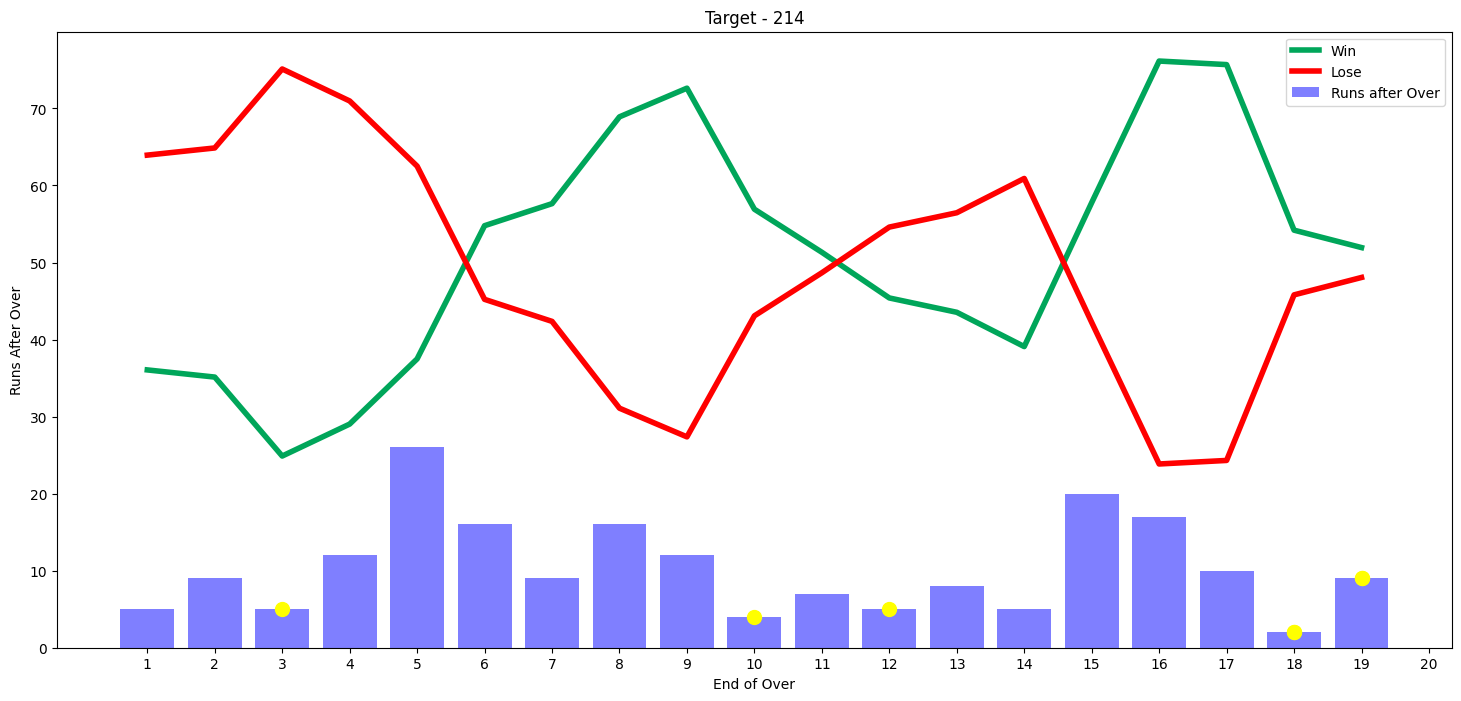

In [56]:
import matplotlib.pyplot as plt

# Assuming temp_df is your DataFrame containing the data

# Your existing code
plt.figure(figsize=(18, 8))
plt.plot(temp_df['end_of_over'], temp_df['win'], color='#00a65a', linewidth=4, label='Win')
plt.plot(temp_df['end_of_over'], temp_df['lose'], color='red', linewidth=4, label='Lose')

# Plotting runs_after_over as a bar plot
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'], color='blue', alpha=0.5, label='Runs after Over')

# Plotting yellow dots for wickets_in_over
for index, row in temp_df.iterrows():
    wickets = int(row['wickets_in_over'])  # Convert to integer
    end_of_over = row['end_of_over']
    plt.scatter([end_of_over] * wickets, [row['runs_after_over']] * wickets, color='yellow', s=100, zorder=5)

# Set x-axis scale from 1 to 20
plt.xticks(range(1, 21))

# Adding labels and title
plt.title('Target - ' + str(target))
plt.xlabel('End of Over')
plt.ylabel('Runs After Over')
plt.legend()
plt.show()

In [57]:
teams

['Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Gujarat Titans',
 'Lucknow Super Giants',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Mumbai Indians']

In [58]:
cities= df['City'].unique().tolist()
cities

['Bangalore',
 'Chandigarh',
 'Delhi',
 'Mumbai',
 'Kolkata',
 'Jaipur',
 'Hyderabad',
 'Chennai',
 'Cape Town',
 'Port Elizabeth',
 'Durban',
 'Centurion',
 'East London',
 'Johannesburg',
 'Kimberley',
 'Bloemfontein',
 'Ahmedabad',
 'Cuttack',
 'Nagpur',
 'Dharamsala',
 'Visakhapatnam',
 'Pune',
 'Raipur',
 'Ranchi',
 'Abu Dhabi',
 'Sharjah',
 'Dubai',
 'Bengaluru',
 'Indore',
 'Navi Mumbai',
 'Lucknow',
 'Guwahati',
 'Mohali']

In [59]:
import pickle
pickle.dump(pipeline,open('pipeline.pkl','wb'))

In [69]:
import joblib
joblib.dump(pipeline, 'my_pipeline.joblib')
loaded_pipeline = joblib.load('my_pipeline.joblib')

In [5]:
import streamlit as st
import joblib
import pandas as pd
import os
teams = ['Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad',
    'Delhi Capitals',
    'Chennai Super Kings',
    'Gujarat Titans',
    'Lucknow Super Giants',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Mumbai Indians']

cities = ['Ahmedabad',
    'Kolkata',
    'Mumbai',
    'Navi Mumbai',
    'Pune',
    'Dubai',
    'Sharjah',
    'Abu Dhabi',
    'Delhi',
    'Chennai',
    'Hyderabad',
    'Visakhapatnam',
    'Chandigarh',
    'Bengaluru',
    'Jaipur',
    'Indore',
    'Bangalore',
    'Raipur',
    'Ranchi',
    'Cuttack',
    'Dharamsala',
    'Nagpur',
    'Johannesburg',
    'Centurion',
    'Durban',
    'Bloemfontein',
    'Port Elizabeth',
    'Kimberley',
    'East London',
    'Cape Town']

In [71]:
file_path = '/workspaces/projects/Team_Winning_Chances_End_to_End/Notebook/pipeline.pkl'
with open(file_path, 'rb') as file:
    pipe = joblib.load(file)
print(pipe)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['BattingTeam', 'Team2',
                                                   'City'])])),
                ('model', LogisticRegression(solver='liblinear'))])


In [ ]:
st.title('Winner Predictor for IPL')

# Using st.columns instead of st.beta_columns
col1, col2 = st.columns(2)

with col1:
    batting_team = st.selectbox('Select the batting team', sorted(teams))
with col2:
    bowling_team = st.selectbox('Select the bowling team', sorted(teams))

selected_city = st.selectbox('Select host city', sorted(cities))

target = st.number_input('Target')

col3, col4, col5 = st.columns(3)

with col3:
    score = st.number_input('Score')
with col4:
    overs = st.number_input('Overs completed')
with col5:
    wickets = st.number_input('Wickets out')

if st.button('Predict Probability'):
    runs_left = target - score
    balls_left = 120 - (overs * 6)
    wickets = 10 - wickets
    crr = score / overs
    rrr = (runs_left * 6) / balls_left

    input_df = pd.DataFrame({'BattingTeam': [batting_team], 'Team2': [bowling_team], 'City': [selected_city],
                             'runs_left': [runs_left], 'balls_left': [balls_left], 'wickets_left': [wickets],
                             'team1_runs': [target], 'crr': [crr], 'rrr': [rrr]})

    result = pipe.predict_proba(input_df)
    loss = result[0][0]
    win = result[0][1]
    st.header(batting_team + "- " + str(round(win * 100)) + "%")
    st.header(bowling_team + "- " + str(round(loss * 100)) + "%")